# 階層的クラスタ分析

<img src='slides/40.png'>

In [3]:
import pandas as pd

# 上記、クラスタリング用データ
data = [
    [5, 1],
    [4, 2],
    [1, 5],
    [5, 4],
        [5, 5]
]

# pandas DataFrame に変換
df = pd.DataFrame(data, columns=['attr1', 'attr2'], index=['x1', 'x2', 'x3', 'x4', 'x5'])

# 確認
df

,attr1,attr2
x1,5,1
x2,4,2
x3,1,5
x4,5,4
x5,5,5


<hr>

### 距離の計算

In [4]:
# pdist: 2点間の距離を計算
# - スライドの例に合わせて、ユークリッド距離の二乗で計算
# - 計算結果は、データの組み合わせだけ
from scipy.spatial.distance import pdist

dist = pdist(df, lambda x, y: ((x - y) ** 2).sum())

# 確認
dist

array([ 2., 32.,  9., 16., 18.,  5., 10., 17., 16.,  1.])

In [5]:
# pdist で計算した距離を確認しやすいように、対称距離行列を作成
# squareform: 対称行列を作成
from scipy.spatial.distance import squareform

pd.DataFrame(squareform(dist), columns=df.index, index=df.index)

,x1,x2,x3,x4,x5
x1,0.0,2.0,32.0,9.0,16.0
x2,2.0,0.0,18.0,5.0,10.0
x3,32.0,18.0,0.0,17.0,16.0
x4,9.0,5.0,17.0,0.0,1.0
x5,16.0,10.0,16.0,1.0,0.0


スライドの表と、同じになっていることを確認

![非類似度](slides/40_1.png)

<hr>

### 距離の計算 (2)

- ユークリッド距離
- マンハッタン距離（市街区距離）

In [6]:
# pdist のオプションでユークリッド距離を指定
# - metric='euclidean'
pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=df.index, index=df.index)

,x1,x2,x3,x4,x5
x1,0.000000,1.414214,5.656854,3.000000,4.000000
x2,1.414214,0.000000,4.242641,2.236068,3.162278
x3,5.656854,4.242641,0.000000,4.123106,4.000000
x4,3.000000,2.236068,4.123106,0.000000,1.000000
x5,4.000000,3.162278,4.000000,1.000000,0.000000


In [7]:
# マンハッタン距離（市街区距離）
# - metric='cityblock'
pd.DataFrame(squareform(pdist(df, metric='cityblock')), columns=df.index, index=df.index)

,x1,x2,x3,x4,x5
x1,0.0,2.0,8.0,3.0,4.0
x2,2.0,0.0,6.0,3.0,4.0
x3,8.0,6.0,0.0,5.0,4.0
x4,3.0,3.0,5.0,0.0,1.0
x5,4.0,4.0,4.0,1.0,0.0


<hr>

### 樹形図の作成

pdist で作成した距離をもとに階層的凝集クラスタリングを行い、樹形図を作成。

In [8]:
# pdist: 2点間の距離を計算
# - ユークリッド距離の二乗で計算
dist = pdist(df, lambda x, y: ((x - y) ** 2).sum())
dist

array([ 2., 32.,  9., 16., 18.,  5., 10., 17., 16.,  1.])

[[ 3.  4.  1.  2.]
 [ 0.  1.  2.  2.]
 [ 5.  6.  5.  4.]
 [ 2.  7. 16.  5.]]


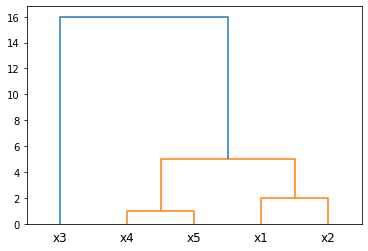

In [14]:
# linkage: 階層的凝集クラスタリング
# - method='single' 最小非類似度
from scipy.cluster.hierarchy import linkage
clusters = linkage(dist, method='single')
print(clusters)
# dendrogram: 樹形図の作成
from scipy.cluster.hierarchy import dendrogram
dendr = dendrogram(clusters, labels=df.index)

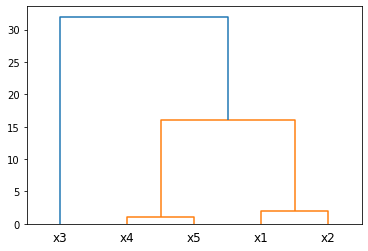

In [11]:
# 階層的凝集クラスタリング
# - method='complete' 最大非類似度
dendr = dendrogram(linkage(dist, method='complete'), labels=df.index)

In [ ]:
# 階層的凝集クラスタリング
# - method='average' 平均非類似度
dendr = dendrogram(linkage(dist, method='average'), labels=df.index)

In [ ]:
# 階層的凝集クラスタリング
# - method='centroid' 重心法
dendr = dendrogram(linkage(dist, method='centroid'), labels=df.index)

In [ ]:
# 階層的凝集クラスタリング
# - method='ward' Ward法
dendr = dendrogram(linkage(dist, method='ward'), labels=df.index)

<hr>

### 樹形図の作成 (2)

linkage で距離の計算まで処理して階層的凝集クラスタリングを行い、樹形図を作成。

- metric に距離の計算方法を指定。

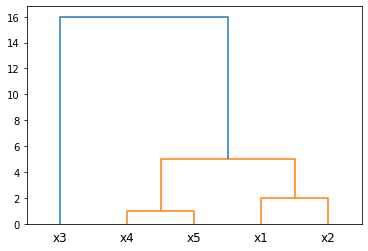

In [12]:
dendr = dendrogram(linkage(df.values, method='single',
                           metric=(lambda x, y: ((x - y) ** 2).sum())),
                   labels=df.index)

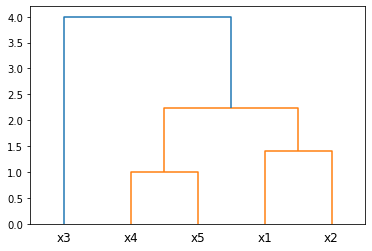

In [13]:
dendr = dendrogram(linkage(df.values, method='single', metric='euclidean'), labels=df.index)